<a href="https://colab.research.google.com/github/shradhakoot1/code/blob/main/Insuarance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Data collection and analysis

In [37]:
#loading csv file to pandas data frame
insuarance=pd.read_csv('/content/insurance.csv')

In [38]:
# top 5 rows
insuarance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


column details:

1.Age:age of primary beneficiary.

2.sex:insurance contractor gender, female, male.

3.bmi: Body mass index.

4.smoker:is he/she smokes or not

5.children: number of childrens of benefeciary

6.region:he beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7.charges: Individual medical costs billed by health insurance

In [39]:
# number of rows and columns:
insuarance.shape

(1338, 7)

Data of 1338 people 


In [40]:
# some info:
insuarance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
#checking missing values:
insuarance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no missing values

Categorical columns:
1. sex
2. smoker
3. region

Data Analysis

In [42]:
# statistical measures:
insuarance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
# 25% data is less than age 27


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


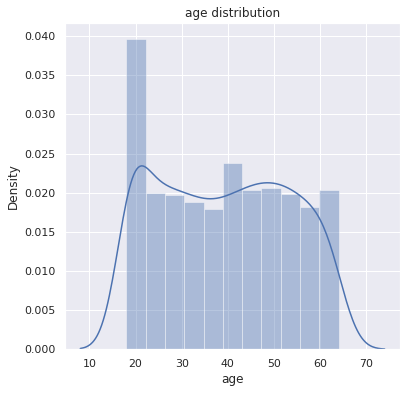

In [44]:
#distribustion of age :
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance['age'])
plt.title('age distribution')
plt.show()

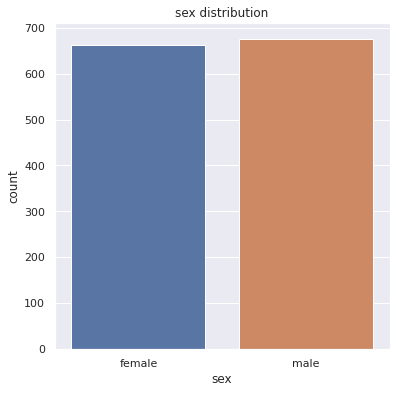

In [45]:
#gender column representation:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insuarance)
plt.title('sex distribution')
plt.show()

In [46]:
insuarance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


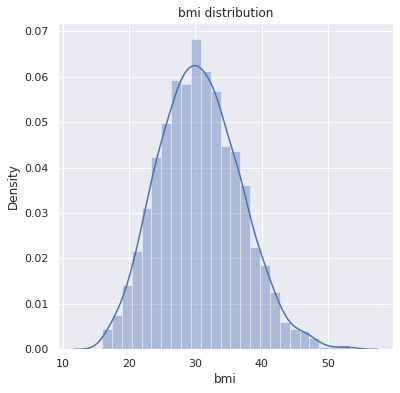

In [47]:
#distribustion of bmi :
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance['bmi'])
plt.title('bmi distribution')
plt.show()

Normal bmi range = 18.5 

if bmi< 18.5 --> underweight


if bmi> 18.5 --> overweight

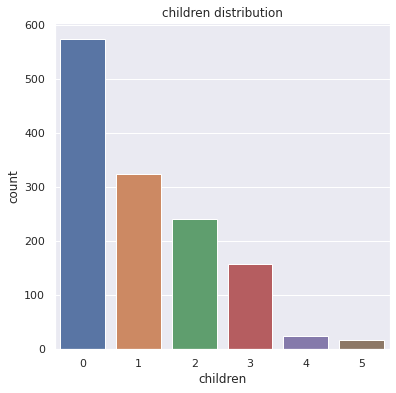

In [48]:
# countplot of children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insuarance)
plt.title('children distribution')
plt.show()

In [49]:
insuarance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

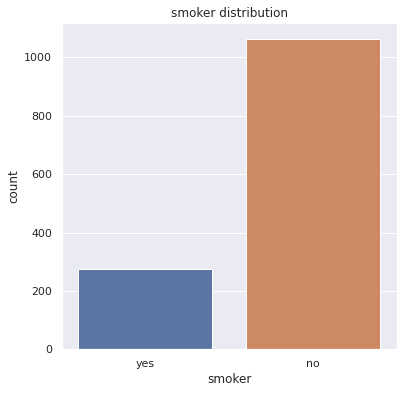

In [50]:
# countplot of smokers and non smokers
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insuarance)
plt.title('smoker distribution')
plt.show()

In [51]:
insuarance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

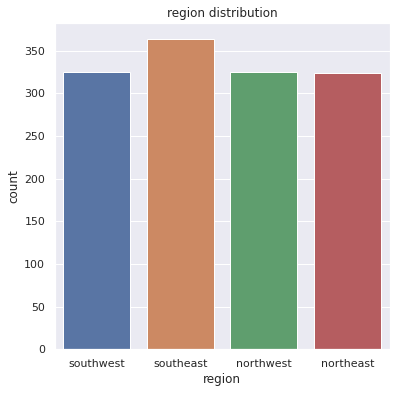

In [52]:
# countplot of regions
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insuarance)
plt.title('region distribution')
plt.show()

In [53]:
insuarance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


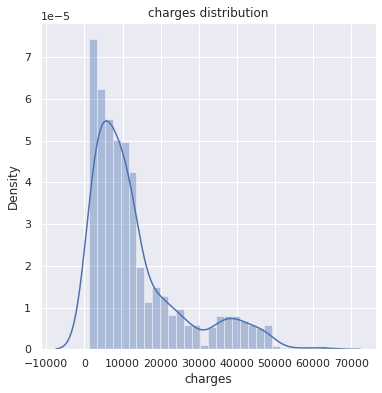

In [54]:
# distribution of charges:
plt.figure(figsize=(6,6))
sns.distplot(insuarance['charges'])
plt.title('charges distribution')
plt.show()

Data preprocessing

Encoding categorical data 

In [55]:
#  encoding sex column 
insuarance.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker column
insuarance.replace({'smoker':{'no':0,'yes':1}},inplace=True)

# encoding smoker column
insuarance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [56]:
insuarance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting the features and target 

In [57]:
x=insuarance.drop(columns='charges',axis=1)
y=insuarance['charges']

In [58]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [59]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the train and test data

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
xtrain.shape,ytrain.shape 

((1070, 6), (1070,))

In [62]:
xtest.shape,ytest.shape

((268, 6), (268,))

Model training

In [63]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

Model evaluation

In [64]:
# prediction on training data
train_data_pred=lr.predict(xtrain)

In [69]:
from sklearn import metrics

In [70]:
# r squared values
r2_train = metrics.r2_score(ytrain,train_data_pred)

In [72]:
print('r-squared value:',r2_train)

r-squared value: 0.751505643411174


In [73]:
# prediction on test data
test_data_pred=lr.predict(xtest)
r2_test = metrics.r2_score(ytest,test_data_pred)
print('r-squared value:',r2_test)

r-squared value: 0.7447273869684076


Building a predictive system

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
input_data=(25,0,26.22,0,0,2)

# changing the input data into numpy array
input_as_array=np.array(input_data)

#reshape the array
reshaped=input_as_array.reshape(1,-1)

prediction=lr.predict(reshaped)

print('the prediction cost is:',prediction)

the prediction cost is: [2808.687798]


In [79]:
# the actual value is 2721.3208